# Analysis on Climatic conditions impacting crop yields across Indian States        

# - Rajendra Bondili

Analyzing crop yields across Indian states, showcasing regional agricultural productivity variations due to climatic conditions  (seasons,rainfall,temperature,pesticides,fertilizers).

Below Valuable insights for informed decision-making.

Crop yield varies across seasons -  showing seaons having highest crop yield and lowest crop yield

Best Crop - showing the crop having high yield value from 1997 to 2020

Relationship between rainfall and crop yield - showing highest crop yield at the recorded annual rainfall(mm) across all the states.

Relationship between pesticides with crop production/yield - showing the impact of pesticides on agricultural crop yield across all the states.

Geomap - To show the overall impact of Annual rainfall on crop yield across all the Indian states.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import hvplot.pandas
import requests
import pandas as pd
import scipy.stats as st
import numpy as np
import warnings
from scipy.stats import linregress
from scipy.stats import ttest_ind
from config import api_key

# Study data files
crop_yield_data_path = "resources/crop_yield.csv"


# Read the mouse data and the study results
crop_yield_df = pd.read_csv(crop_yield_data_path)

# Display the data table for preview
crop_yield_df.head()


,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
0,Arecanut,1997,Whole Year,Assam,73814.0,56708,2051.4,7024878.38,22882.34,0.796087
1,Arhar/Tur,1997,Kharif,Assam,6637.0,4685,2051.4,631643.29,2057.47,0.710435
2,Castor seed,1997,Kharif,Assam,796.0,22,2051.4,75755.32,246.76,0.238333
3,Coconut,1997,Whole Year,Assam,19656.0,126905000,2051.4,1870661.52,6093.36,5238.051739
4,Cotton(lint),1997,Kharif,Assam,1739.0,794,2051.4,165500.63,539.09,0.420909


In [2]:
# Checking the null values
crop_yield_df[crop_yield_df.isnull().any(axis=1)]

# Drop rows if there are any null values
crop_yield_df.dropna(axis=0, how="all")

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
0,Arecanut,1997,Whole Year,Assam,73814.0,56708,2051.4,7024878.38,22882.34,0.796087
1,Arhar/Tur,1997,Kharif,Assam,6637.0,4685,2051.4,631643.29,2057.47,0.710435
2,Castor seed,1997,Kharif,Assam,796.0,22,2051.4,75755.32,246.76,0.238333
3,Coconut,1997,Whole Year,Assam,19656.0,126905000,2051.4,1870661.52,6093.36,5238.051739
4,Cotton(lint),1997,Kharif,Assam,1739.0,794,2051.4,165500.63,539.09,0.420909
...,...,...,...,...,...,...,...,...,...,...
19684,Small millets,1998,Kharif,Nagaland,4000.0,2000,1498.0,395200.00,1160.00,0.500000
19685,Wheat,1998,Rabi,Nagaland,1000.0,3000,1498.0,98800.00,290.00,3.000000
19686,Maize,1997,Kharif,Jammu and Kashmir,310883.0,440900,1356.2,29586735.11,96373.73,1.285000
19687,Rice,1997,Kharif,Jammu and Kashmir,275746.0,5488,1356.2,26242746.82,85481.26,0.016667


# One- way ANOVA Hypothesis of Total Crop production for each season in India

<Axes: title={'center': 'Production'}, xlabel='Season'>

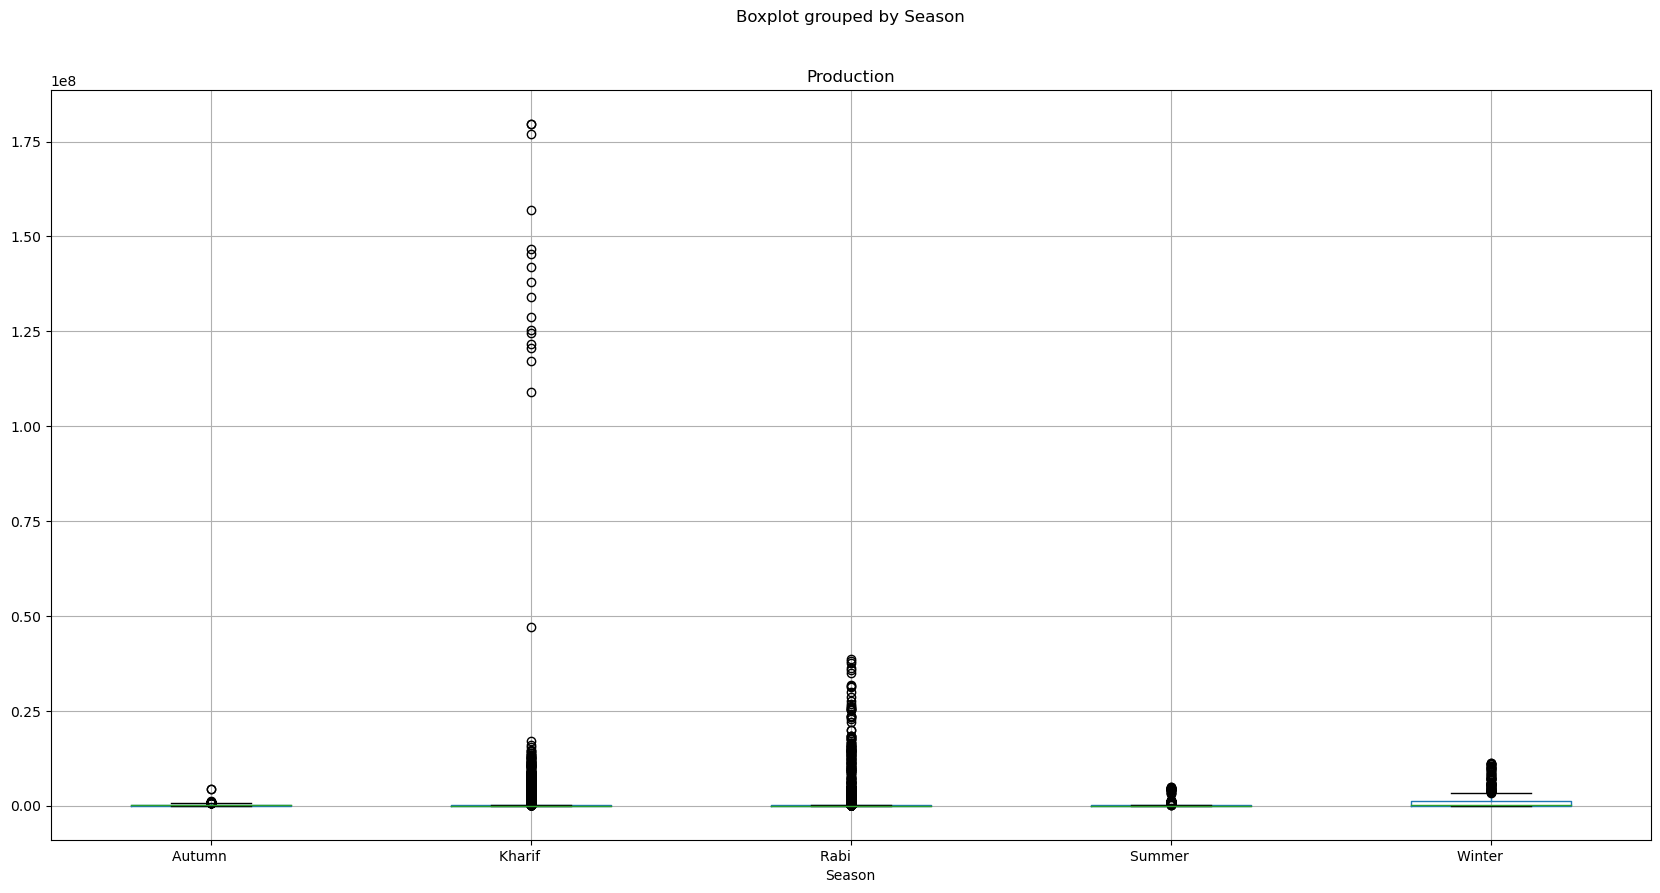

In [3]:
# Extract seasons
season_group_df = crop_yield_df[crop_yield_df["Season"].str.strip()!="Whole Year"]
seasons = season_group_df["Season"].unique()



# Create a boxplot to compare means
season_group_df.boxplot("Production", by="Season", figsize=(20, 10))

In [4]:
#Extract individual groups
group0 = season_group_df[season_group_df["Season"] == seasons[0]]['Production']
group1 = season_group_df[season_group_df["Season"] == seasons[1]]['Production']
group2 = season_group_df[season_group_df["Season"] == seasons[2]]['Production']
group3 = season_group_df[season_group_df["Season"] == seasons[3]]['Production']
group4 = season_group_df[season_group_df["Season"] == seasons[4]]['Production']


#Perform the ANOVA
st.f_oneway(group0, group1, group2, group3, group4) 
print("\x1b[36;1mANOVA suggests to accept Alternate hypothesis as pvalue > 0.05,\nwhich implies seasons has significant impact on Crop Production or Yield\x1b[0m")

ANOVA suggests to accept Alternate hypothesis as pvalue > 0.05,
which implies seasons has significant impact on Crop Production or Yield


## Analyse the impact of crops yield based on different seasons

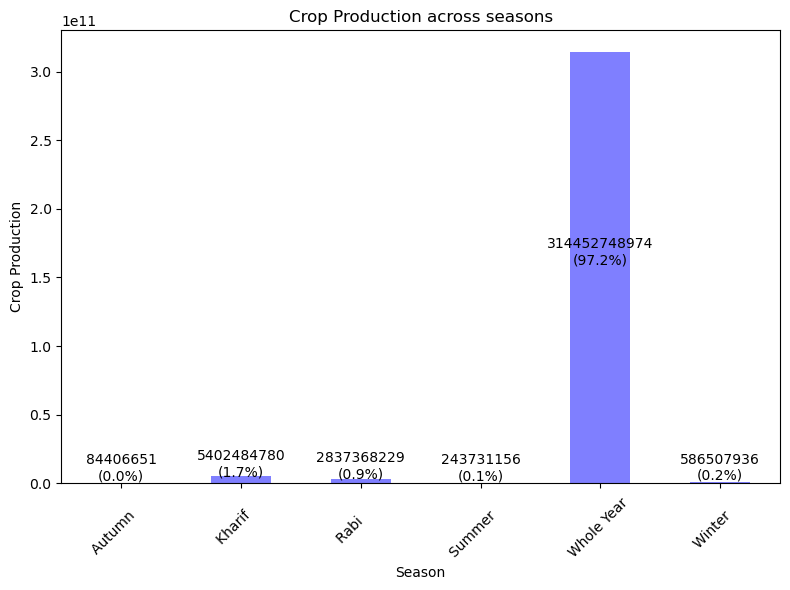

Heighest Crop season : Kharif with the Crop Production : 5402484780 
Lowest Crop season : Autumn with the Crop Production : 84406651


In [5]:
# Generate a bar plot showing the crop production for each season using Pandas.
crop_season_df = crop_yield_df.groupby(['Season'])['Production'].sum()
crop_season_df.sort_values(ascending=False)

#Highest and lowest crop production across the seasons
seasons_df = crop_season_df[crop_season_df.keys().str.strip()!="Whole Year"]
max_value = seasons_df.max()
min_value = seasons_df.min()
heighest_season = seasons_df[seasons_df.values==max_value].keys()
lowest_season  = seasons_df[seasons_df.values==min_value].keys()

# create a bar plot
bar_plot = crop_season_df.plot(kind="bar", figsize=(8,6),title="Crop Production across seasons",color='b', alpha=0.5, align="center")
plt.xticks(rotation=45)
plt.ylabel("Crop Production")

# Annotate the bar values
for bar in bar_plot.patches:
    # get the height, width, and position of each bar
    height = bar.get_height()
    width = bar.get_width()
    x = bar.get_x()
    y = bar.get_y()
    
    # format the label with the value and percentage
    label_text = f"{height}\n({height/sum(crop_yield_df['Production']):.1%})"
  
    # add the label to the bar
    bar_plot.annotate(label_text, xy=(x + width/2, y + height/2),
                      ha="center", va="bottom")
    
plt.tight_layout()
plt.savefig("output/seasons_crop_yield.png")
plt.show()

print(f"Heighest Crop season : {heighest_season[0].strip()} with the Crop Production : {max_value} \nLowest Crop season : {lowest_season[0].strip()} with the Crop Production : {min_value}") 

# Analyse Best Crop based on the crop Yield from 1997to 2020

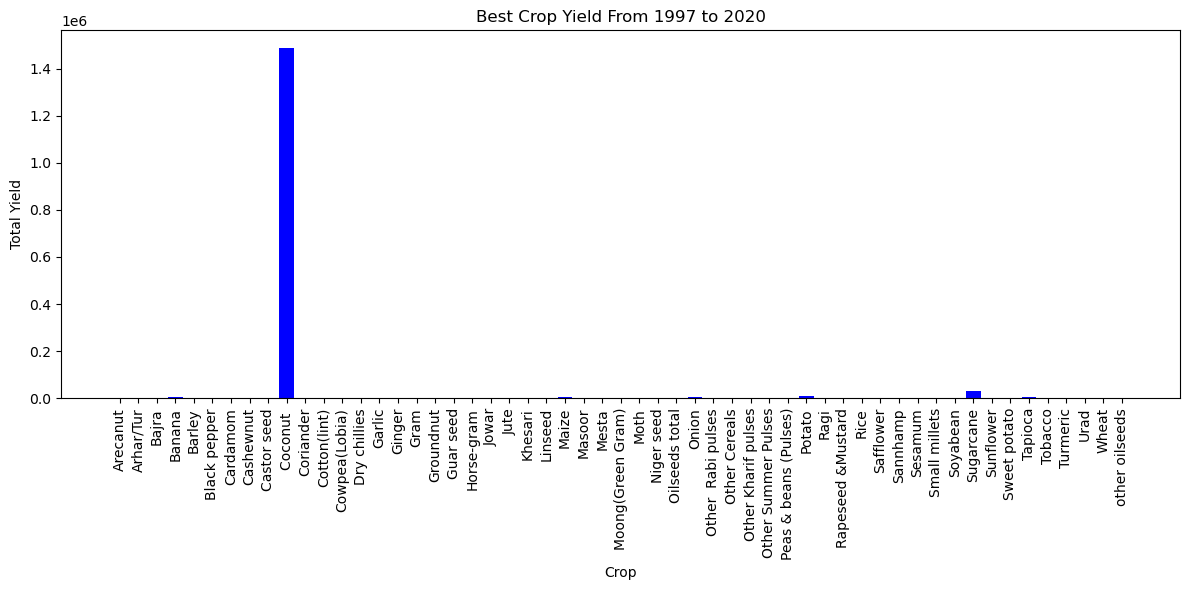

Coconut is the best crop with the highest crop yield from 1997 to 2020


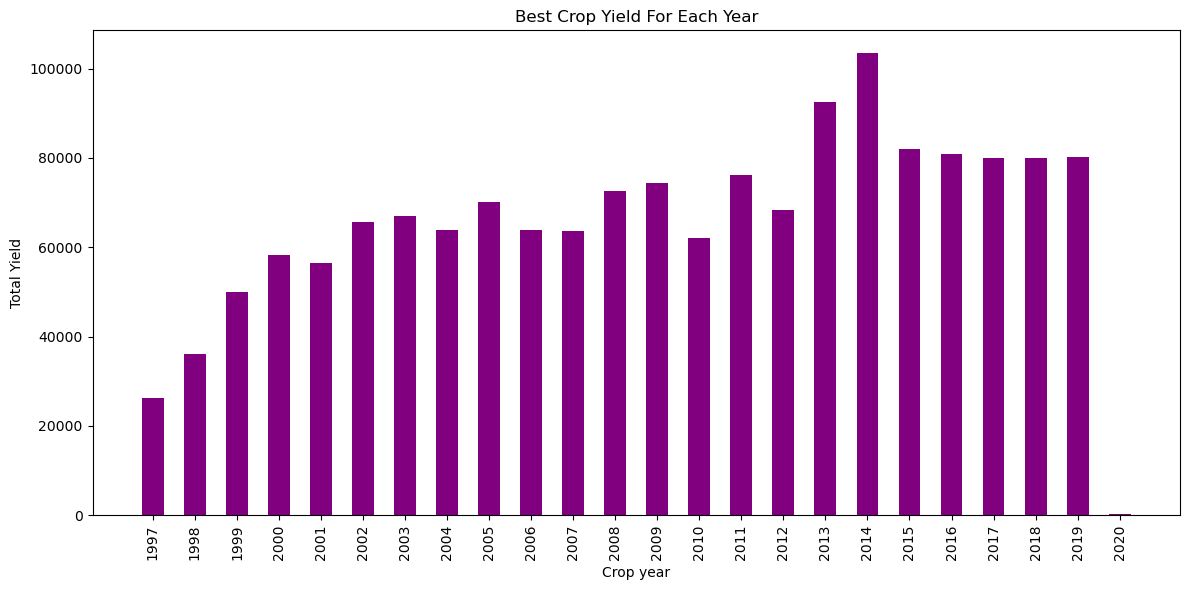

2014 has the highest crop yield: 103400.057623567
2020 has the lowest crop yield: 163.543553181


In [6]:
# Create a bar chart for best crop yield
crop_production = crop_yield_df.groupby("Crop")["Yield"].sum()
best_crop = crop_production[crop_production.values==crop_production.values.max()].keys().str.strip()
plt.figure(figsize=(12, 6))
plt.bar(crop_production.index, crop_production.values, color="blue")
plt.xlabel("Crop")
plt.ylabel("Total Yield")
plt.title("Best Crop Yield From 1997 to 2020")
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig("output/Best_crop_yield.png")
plt.show()
print(f"{best_crop[0]} is the best crop with the highest crop yield from 1997 to 2020")

# Create a bar chart for best crop yield for each year
production_year = crop_yield_df.groupby("Crop_Year")["Yield"].sum()
highest_yield_year = production_year[production_year.values==production_year.values.max()].keys()
lowest_yield_year  = production_year[production_year.values==production_year.values.min()].keys()
x_axis = np.arange(len(production_year))
tick_locations = [value for value in x_axis]
plt.figure(figsize=(12, 6))
plt.bar(x_axis, production_year, color='purple', align="center", width = 0.52)
plt.xticks(tick_locations, list(production_year.index), rotation=90)
plt.title("Best Crop Yield For Each Year")
plt.xlabel("Crop year")
plt.ylabel("Total Yield")
plt.tight_layout()
plt.savefig("output/Best_crop_yield_year.png")
plt.show()

print(f"{highest_yield_year[0]} has the highest crop yield: {production_year.values.max()}\n{lowest_yield_year[0]} has the lowest crop yield: {production_year.values.min()}")


# Analyse Top 5 crops for the Kharif season

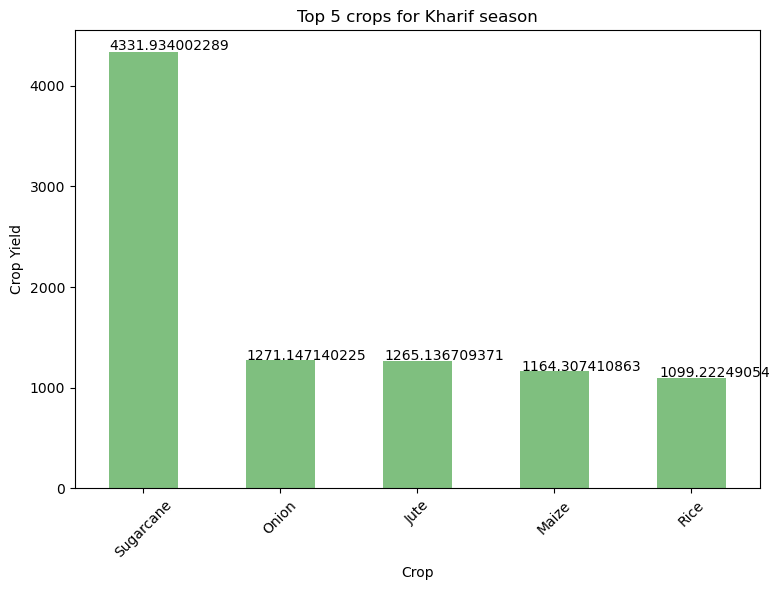

In [7]:
#Top 5 Crop produced for Kharif season
kharif_crop_yield_df = crop_yield_df[crop_yield_df["Season"].str.strip()=="Kharif"]
top_crop_yield_df= kharif_crop_yield_df.groupby("Crop")["Yield"].sum().sort_values(ascending=False)
top5=top_crop_yield_df.head(5)
br= top5.plot(kind="bar", figsize=(8,6),title="Top 5 crops for Kharif season",color='g', alpha=0.5, align="center")
plt.xticks(rotation=45)
plt.ylabel("Crop Yield")

# annotate each bar with the value
for b in br.patches:
    # add the label to the bar  
    br.annotate(str(b.get_height()), (b.get_x() * 1.005, b.get_height() * 1.005))

plt.tight_layout()
plt.savefig("output/kharif_top5_crop_yield.png")
plt.show()

# Analyse relationship between Annual Rainfall on Crop Production

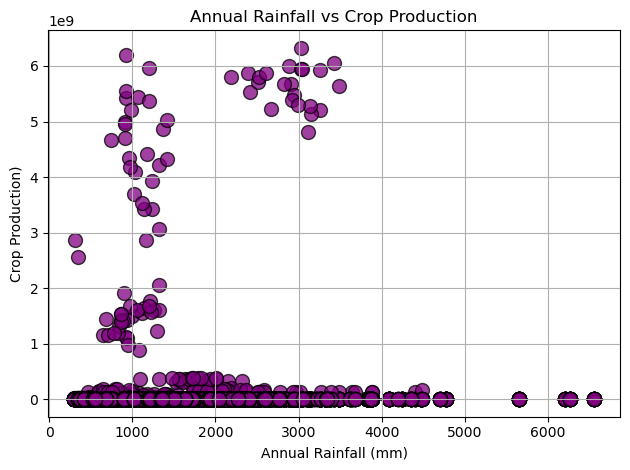

The scatter plot is to represnt the relationship between the Annual Rainfall and Crop production
The Highest crop production: 6326000000 is recorded at 3030.9mm rainfall 


In [8]:
# Generate a scatter plot showing the relationship between annual rainfall on crop production
crop_production = crop_yield_df["Production"]
rainfall = crop_yield_df["Annual_Rainfall"]

# Highest crop yield at annual rainfall
sorted_crop_production = crop_yield_df.sort_values("Production",ascending=False)
max_crop_df =sorted_crop_production.iloc[:1] 
heighest_yield = max_crop_df["Production"].values
rainfall_for_heighest_crop = max_crop_df["Annual_Rainfall"].values


# create a scatter plot
plt.scatter(rainfall, crop_production, marker="o", facecolors="purple", edgecolors="black",
            s=100, alpha=0.75)
plt.grid()
plt.xlabel("Annual Rainfall (mm)")
plt.ylabel("Crop Production)")
plt.title(f"Annual Rainfall vs Crop Production")
plt.tight_layout()
plt.savefig("output/rainfall_crop_yield.png")
plt.show()

print(f"The scatter plot is to represnt the relationship between the Annual Rainfall and Crop production\nThe Highest crop production: {heighest_yield[0]} is recorded at {rainfall_for_heighest_crop[0]}mm rainfall ")


# Analyse relationship between pesticides and Crop yield

In [9]:
# Picking out relevant columns
reduced_crop_df = crop_yield_df[['Crop','Crop_Year','Pesticide', 'Yield', 'Production']]

# Displaying created DataFrame
reduced_crop_df.head()

,Crop,Crop_Year,Pesticide,Yield,Production
0,Arecanut,1997,22882.34,0.796087,56708
1,Arhar/Tur,1997,2057.47,0.710435,4685
2,Castor seed,1997,246.76,0.238333,22
3,Coconut,1997,6093.36,5238.051739,126905000
4,Cotton(lint),1997,539.09,0.420909,794


In [10]:
# Define a function to create Linear Regression plots
def linear_regression(x,y):    
    (slope, intercept, rvalue, p_value, stderr) = linregress(x, y)
    print(f"r-value is {rvalue ** 2}")
    ttest_result = ttest_ind(x,y,equal_var=False)
    pvalue = ttest_result.pvalue
    stasticvalue= ttest_result.statistic   
    print("\x1b[32;1mHypothesis testing:\x1b[0m")    
    if pvalue<0.05:        
        print("Accepting Null hypothesis and rejecting Alternate hypothesis")
        print(f"pvalue is {pvalue:.4f}, test stastics is {stasticvalue:.4f}  and correlation is statistically significant.")
    else:
        print("Accepting Alternative hypothesis and rejecting Null hypothesis")
        print(f"pvalue is {pvalue:.4f},test stastics is {stasticvalue:.4f} and correlation is statistically insignificant.")
        
    regress_values = x * slope + intercept
    line_eq = "y =" + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x, y)
    plt.plot(x,regress_values,"r-")
    return line_eq

# Define a fuction for annotating
def annotate(line_eq, a, b):
    plt.annotate(line_eq,(a,b),fontsize=15,color="red")

NULL Hypothesis: Low Pesticide usage will increase Crop Yield
ALTERNATE Hypothesis:High Pesticide usage will increase Crop Yield
r-value is 3.1742187184668185e-06
Hypothesis testing:
Accepting Null hypothesis and rejecting Alternate hypothesis
pvalue is 0.0000, test stastics is 32.0835  and correlation is statistically significant.


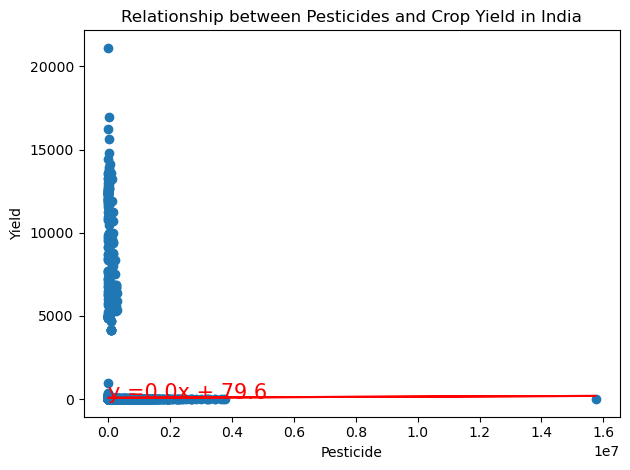

The plot is to represent the Impact of Pesticide on Crop Yield 
The highest Yield is recorded at lowest pesticide usage


In [11]:
#Hypothesis assumptions
print("\x1b[34;1mNULL Hypothesis: Low Pesticide usage will increase Crop Yield\nALTERNATE Hypothesis:High Pesticide usage will increase Crop Yield\x1b[0m")

#Generate a line plot showing relationship between usage of pesticide on crop yield
line_eq = linear_regression(reduced_crop_df['Pesticide'], reduced_crop_df['Yield'])
#Annotate the plot
annotate(line_eq, 20,20)

# Set a title
plt.title("Relationship between Pesticides and Crop Yield in India")

# Set xlabel
plt.xlabel("Pesticide")

# Set ylabel
plt.ylabel("Yield")

plt.tight_layout()

# Save the figure
plt.savefig("output/Pesticides_Crop_Yield.png")

plt.show()

print("The plot is to represent the Impact of Pesticide on Crop Yield \nThe highest Yield is recorded at lowest pesticide usage")

NULL Hypothesis: Low Pesticide usage will increase Crop Production
ALTERNATE Hypothesis:High Pesticide usage will increase Crop Production
r-value is 0.0012370316329160002
Hypothesis testing:
Accepting Null hypothesis and rejecting Alternate hypothesis
pvalue is 0.0000, test stastics is -8.7411  and correlation is statistically significant.


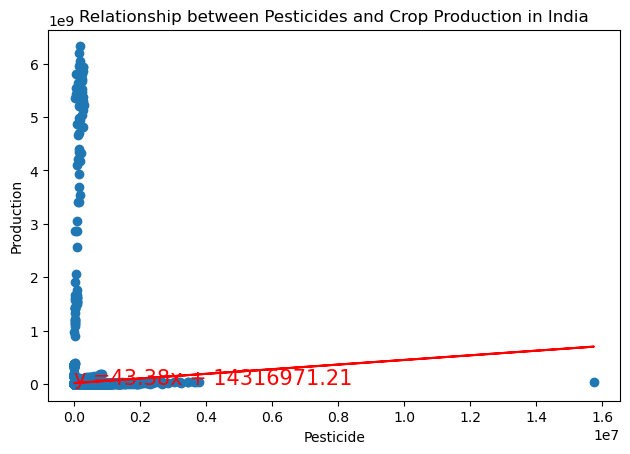

The plot is to represent the Impact of Pesticide on Crop Production 
The highest Crop Production is recorded at lowest Pesticide usage


In [12]:
#Hypothesis assumptions
print("\x1b[34;1mNULL Hypothesis: Low Pesticide usage will increase Crop Production\nALTERNATE Hypothesis:High Pesticide usage will increase Crop Production\x1b[0m")

#Generate a line plot showing relationship between usage of pesticide on crop Production
line_eq = linear_regression(reduced_crop_df['Pesticide'], reduced_crop_df['Production'])
#Annotate the plot
annotate(line_eq, 20,20)

# Set a title
plt.title("Relationship between Pesticides and Crop Production in India")

# Set xlabel
plt.xlabel("Pesticide")

# Set ylabel
plt.ylabel("Production")

plt.tight_layout()
# Save the figure
plt.savefig("output/Pesticides_Crop_Production.png")

plt.show()


print("The plot is to represent the Impact of Pesticide on Crop Production \nThe highest Crop Production is recorded at lowest Pesticide usage")

# Analyse Annual Rainfall & Crop Production across for Kharif season across each state in India using csv files for the coordinates

In [13]:
crop_yield_df = crop_yield_df[crop_yield_df["Season"].str.strip()=="Kharif"]
crop_yield_df.head()

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
1,Arhar/Tur,1997,Kharif,Assam,6637.0,4685,2051.4,631643.29,2057.47,0.710435
2,Castor seed,1997,Kharif,Assam,796.0,22,2051.4,75755.32,246.76,0.238333
4,Cotton(lint),1997,Kharif,Assam,1739.0,794,2051.4,165500.63,539.09,0.420909
7,Jute,1997,Kharif,Assam,94520.0,904095,2051.4,8995468.40,29301.20,9.919565
9,Maize,1997,Kharif,Assam,19216.0,14721,2051.4,1828786.72,5956.96,0.615652


In [14]:
# Geoviews to show the rainfall across the states of india
warnings.filterwarnings('ignore')

# States data file
states_data_path = "resources/states.csv"

# Read the mouse data and the study results
states_df = pd.read_csv(states_data_path)

# Combine the data into a single DataFrame
merged_df= pd.merge(crop_yield_df,states_df,on="State")

# Display the data table for preview
merged_df.head() 

# new columns to the dataframe
states_df["Annual Rainfall"] = ""
states_df["Crop Production"] = ""
states_df["Season"] = ""
#aggregate rainfall and crop production column values
Annual_Rainfall =  merged_df.groupby(['State'])['Annual_Rainfall'].sum()
crop_production =  merged_df.groupby(['State'])['Production'].sum()
Season =  merged_df.groupby(['State'])['Season'].unique()

#populate rainfall and crop production column values
states_df["Annual Rainfall"] = Annual_Rainfall.values
states_df["Crop Production"] = crop_production.values
states_df["Season"] = Season.values

# Display the data table for preview
states_df.head()

,State,Lat,Lng,Annual Rainfall,Crop Production,Season
0,Andhra Pradesh,14.750429,78.570026,521818.500000,340830752,[Kharif ]
1,Arunachal Pradesh,27.100399,93.616601,304592.700000,5861787,[Kharif ]
2,Assam,26.749981,94.216667,429814.372724,19107777,[Kharif ]
3,Bihar,25.785414,87.479973,404223.900000,39117615,[Kharif ]
4,Chhattisgarh,21.295132,81.828232,494404.300000,127211880,[Kharif ]


In [15]:
plot_map_1= states_df.hvplot.points("Lng","Lat",geo=True,tiles="OSM",frame_width=700,frame_height=500,
                                    scale = 0.01, color = "State",hover_cols=["State","Season","Annual Rainfall","Crop Production"])


# Display the map plot
plot_map_1

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [Lng,Lat]   (State,Season,Annual Rainfall,Crop Production)

# Analyse Annual Rainfall & Crop Production  for Kharif season across each state in India using Weather API for the coordinates

In [ ]:
# Geoviews to show the rainfall across the states of india
warnings.filterwarnings('ignore')

# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
country = ",IN"
units = "metric"
success =200
Telangana_state="Telangana"
Tel_df = states_df[states_df["State"]==Telangana_state]
Tel_lat=Tel_df["Lat"].values
Tel_lng=Tel_df["Lng"].values


# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="


# States data file
states = crop_yield_df["State"].unique()

# set up lists to hold reponse info
lat = []
lng = []

# Loop through the list of cities and perform a request for data on each
for state in states:
    res = requests.get(query_url + state + country)    
    if res.status_code == success:
        response = res.json()        
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
    elif state == Telangana_state:
        lat.append(Tel_lat)
        lng.append(Tel_lng)

        
        
states_dict = {
    "State": states,
    "lat": lat,
    "lng": lng
}

states1_df = pd.DataFrame(states_dict)      


# Combine the data into a single DataFrame
merged_df= pd.merge(crop_yield_df,states1_df,on="State")

# Display the data table for preview
merged_df.head() 

# new columns to the dataframe
states1_df["Annual Rainfall"] = ""
states1_df["Crop Production"] = ""
states1_df["Season"] = ""
#aggregate rainfall and crop production column values
Annual_Rainfall =  merged_df.groupby(['State'])['Annual_Rainfall'].sum()
crop_production =  merged_df.groupby(['State'])['Production'].sum()
Season =  merged_df.groupby(['State'])['Season'].unique()


#populate rainfall and crop production column values
states1_df["Annual Rainfall"] = Annual_Rainfall.values
states1_df["Crop Production"] = crop_production.values
states1_df["Season"] = Season.values



# Display the data table for preview
states1_df.head()

In [ ]:
plot_map_2= states1_df.hvplot.points("lng","lat",geo=True,tiles="OSM",frame_width=700,frame_height=500,
                                    scale = 0.01, color = "State",hover_cols=["State","Season","Annual Rainfall","Crop Production"])


# Display the map plot
plot_map_2